# HR Analytics Project

From the problem statement we can figure out that attrition is our target, which we will confirm after loading our data set

But First Let us import some necessary libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\benem\Desktop\ML MODELS\WA_Fn-UseC_-HR-Employee-Attrition.csv")

we have downloaded the zip file of our dataset and loaded it from our computer

In [3]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

We have 1470 rows and 35 columns in our data set. We can confirm now that our target variable is attrition, which needs to be predicted.All the other columns are our independent variables or features. Another thing we notice is that the target data 'Attrition' is binary in nature. Therefore this is a classification problem

Now lets us have a look at our columns

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

# Checking Null Values

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

we dont have any null values present in our dataset

# Checking The DataType Of our columns

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We can observe that 9 of ur columns are of object data type and since Machine Learning models only accept numerical value. Therefore,we will have to change the objec datatype of these columns to int

# Checking Unique Values 

In [9]:
df.nunique().to_frame('Unique Values')

Unique Values
Age                                  43
Attrition                             2
BusinessTravel                        3
DailyRate                           886
Department                            3
DistanceFromHome                     29
Education                             5
EducationField                        6
EmployeeCount                         1
EmployeeNumber                     1470
EnvironmentSatisfaction               4
Gender                                2
HourlyRate                           71
JobInvolvement                        4
JobLevel                              5
JobRole                               9
JobSatisfaction                       4
MaritalStatus                         3
MonthlyIncome                      1349
MonthlyRate                        1427
NumCompaniesWorked                   10
Over18                                1
OverTime                              2
PercentSalaryHike                    15
PerformanceRating                     2
RelationshipSatisfaction              4
StandardHours                         1
StockOptionLevel                      4
TotalWorkingYears                    40
TrainingTimesLastYear                 7
WorkLifeBalance                       4
YearsAtCompany                       37
YearsInCurrentRole                   19
YearsSinceLastPromotion              16
YearsWithCurrManager                 18

we are checking the unique values for each columns. We see that some columns have unique values

# Description of the DataFrame

In [10]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

for a better understaing let us take the transpose as too many columns are present

In [11]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

From the description we observe that difference between the 25%,50% with max is almost half there we can say that outliers may be present. for the diff between the 75% and max outliers are present but lesser compared to the other two.
We can confirm that no null values from count again

Another thing that we can observe is that the employee count column has value 1 in all columns which is of no use in our dataframe

The employee number is just a unique number that is assigned to an employee and is of no use for us in our prediction

similarly for standard hours we have same value 80 throughtout which has no use.

Also the Over18 column doesn't make any sense as you can only be employed if you are 18+, therefore we can dropped it.

# Dropping useless columns

In [12]:
df=df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1)
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467              

# EDA

# Visualization

Let us make a seperate data frame for visualization of object data 

In [13]:
obj_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        obj_datatype.append(x)
obj_datatype


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Let us make a seperate data frame for visualization of int data 

In [14]:
int_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        int_datatype.append(x)
int_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

CountPLot

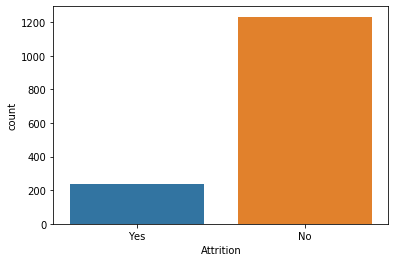

In [15]:
sns.countplot(df['Attrition'])

We can see that there is large data imbalance present in our target variable attrition. Which can be taken care of latern on with the help of SMOTE 

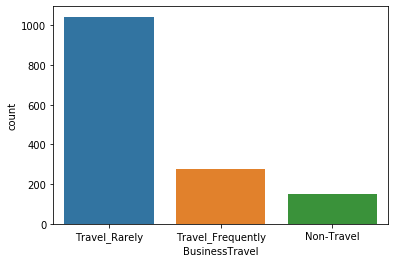

In [16]:
sns.countplot(df['BusinessTravel'])

We observe that there is a high number of eployees who do not prefer to travel, and very number who are non travellers

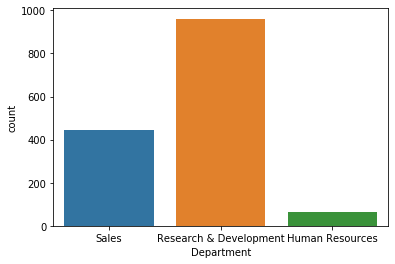

In [17]:
sns.countplot(df['Department'])

We can observa that the least number of values are present in Human Resources which means less employees, and RandD has the highest number of values close to 900, Sales employees are almost hald of R and D

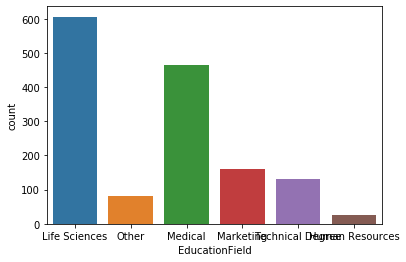

In [18]:
sns.countplot(df['EducationField'])

In the education field column the highest number of employess are from life sciences background and least from HR

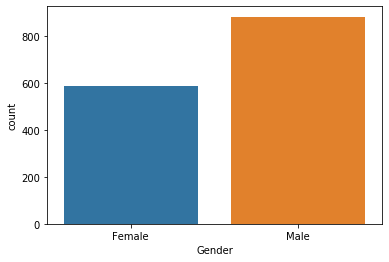

In [19]:
sns.countplot(df['Gender'])

The female gender is lesser compared to males

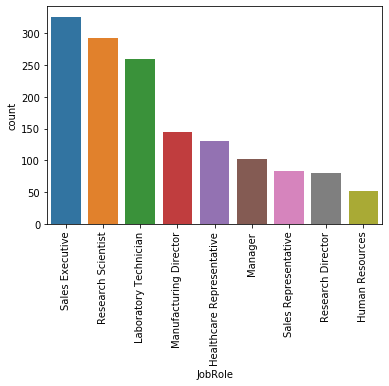

In [20]:
sns.countplot(df['JobRole'])
plt.xticks(rotation=90)
plt.show()

Here we can see that sales executive are the highest in number and HR is least

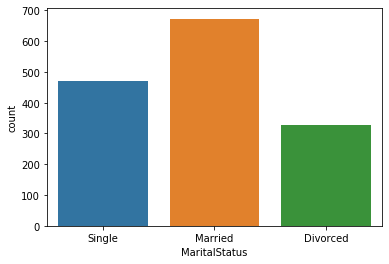

In [21]:
sns.countplot(df['MaritalStatus'])

most of the employess are married and the least are divorced

since over 18 doesn't make any sense as all employees should be 18+ in order to be working as an employee in an organization, thereforre we can drop it

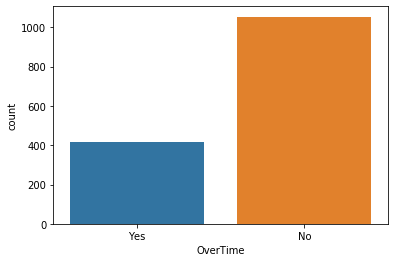

In [22]:
sns.countplot(df['OverTime'])

we can observe that majority of the employess don't prefer to work overtime

Scatter plot

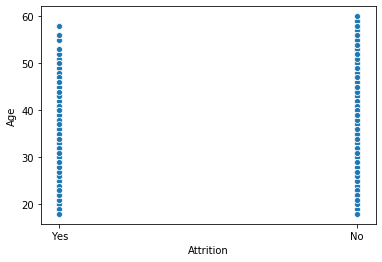

In [23]:
sns.scatterplot(x="Attrition", y="Age", data=df)

Based on the Age we can see that the data is unform for employees who are attrited or not

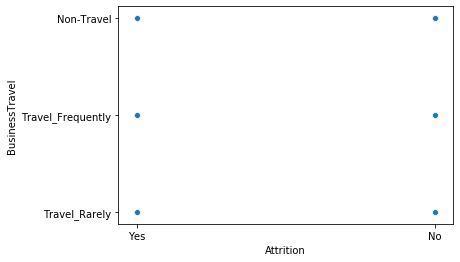

In [24]:
sns.scatterplot(x="Attrition", y="BusinessTravel", data=df)

Based on how buisness travel affects attrition we see that the data is uniformly distributed for people who tarvel Rarely, tarvel frequently and no travelling

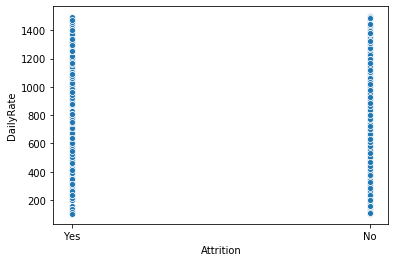

In [25]:
sns.scatterplot(x="Attrition", y="DailyRate", data=df)

Based on Daily rate the data for attrition is unifromly distributed

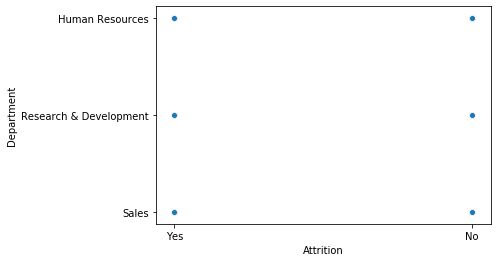

In [26]:
sns.scatterplot(x="Attrition", y="Department", data=df)

Based on the department we observe that whether the employee is attrited or not is unifromly dsitributed for Sales,R and D and HR

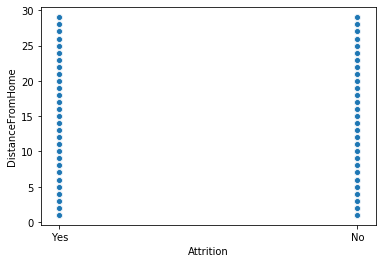

In [27]:
sns.scatterplot(x="Attrition", y="DistanceFromHome", data=df)

Based on the distance from home , whetehr or not the employee is attrited or not is uniformly distributed

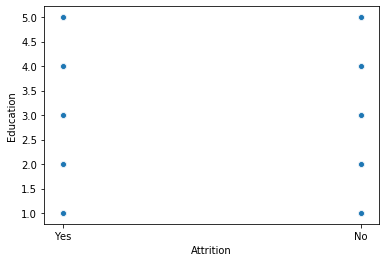

In [28]:
sns.scatterplot(x="Attrition", y="Education", data=df)

Based on Education , Whether or not the employee is attrited is uniformly distributed

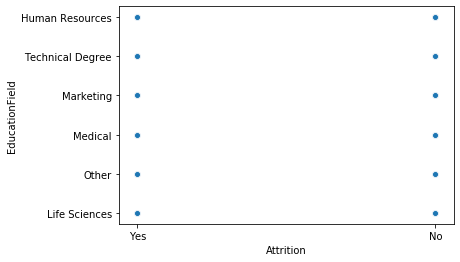

In [29]:
sns.scatterplot(x="Attrition", y="EducationField", data=df)

Based on EducationField , Whether or not the employee is attrited is unifromly distributed in LifeSciences,Other,Medical,Maarketing,TechnicalDegree,Human Resources

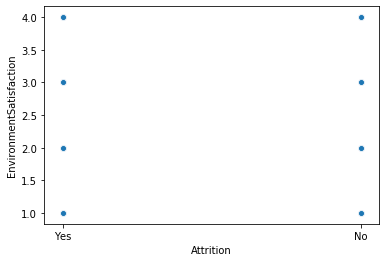

In [30]:
sns.scatterplot(x="Attrition", y="EnvironmentSatisfaction", data=df)

Based on EnvironmentalSatisfaction, whether or not the employee is attrited or not is uniformly dsitributed

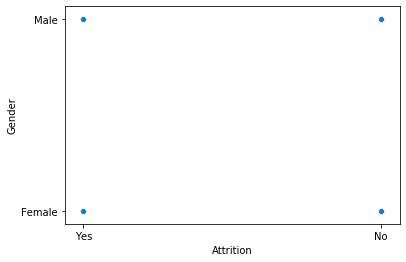

In [31]:
sns.scatterplot(x="Attrition", y="Gender", data=df)

Based on gender whether or not an employee is attrited is uniformly dsitributed for male as well as female

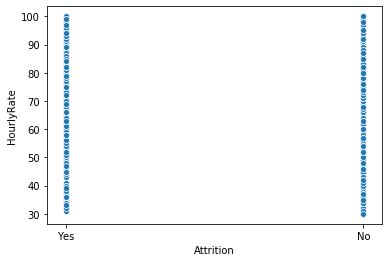

In [32]:
sns.scatterplot(x="Attrition", y="HourlyRate", data=df)

Based on hourly rate , whether or not an employee is attrited is uniformly distributed

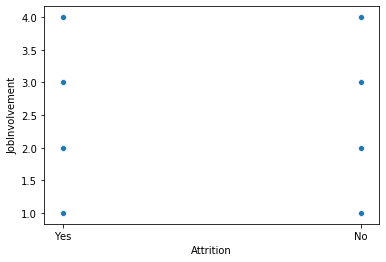

In [33]:
sns.scatterplot(x="Attrition", y="JobInvolvement", data=df)

Based on JobInvolvement , whether or not an employee is attrited is uniformly distributed

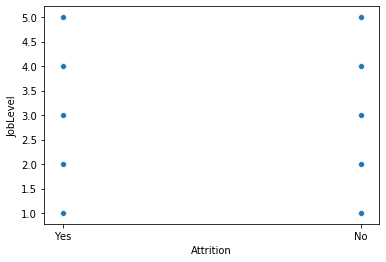

In [34]:
sns.scatterplot(x="Attrition", y="JobLevel", data=df)

Based on JobLevel , whether or not an employee is attrited is uniformly distributed

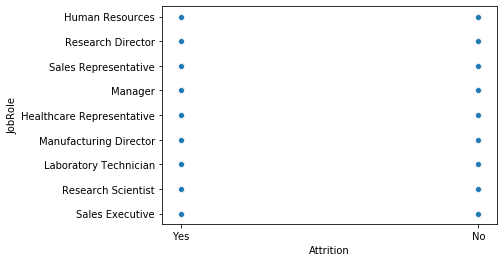

In [35]:
sns.scatterplot(x="Attrition", y="JobRole", data=df)

Based on role , whether or not an employee is attrited is uniformly distributed in sales executive,research scientist,lab technician,manufacturing direction,healthcare representative,manger,sales representative,research director,human resources

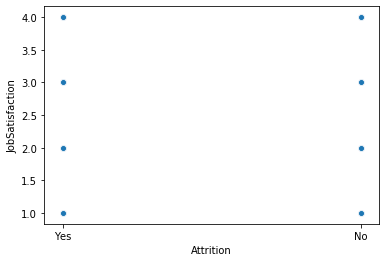

In [36]:
sns.scatterplot(x="Attrition", y="JobSatisfaction", data=df)

Based on JobSatisfaction , whether or not an employee is attrited is uniformly distributed

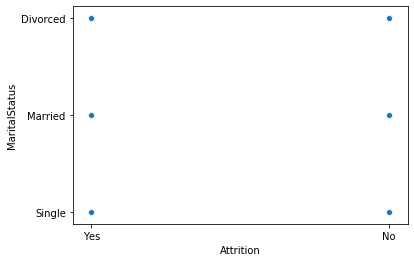

In [37]:
sns.scatterplot(x="Attrition", y="MaritalStatus", data=df)

Based on Marital status, whether or not an employee is attrited is uniformly distributed for married,single and divorced

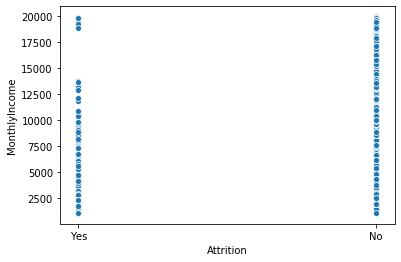

In [38]:
sns.scatterplot(x="Attrition", y="MonthlyIncome", data=df)

Based on Monthly income, whether or not an employee is attrited is almost uniformly distributed . we can also see that after monthly income of around 14000 there is a break in the data, which may indicate that they switch their company

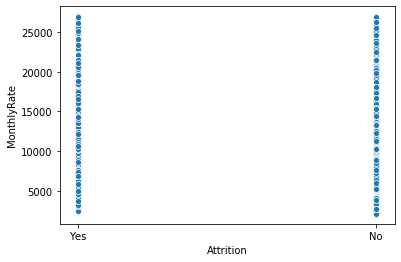

In [39]:
sns.scatterplot(x="Attrition", y="MonthlyRate", data=df)

Based on MonthlyRate, whether or not an employee is attrited is uniformly distributed

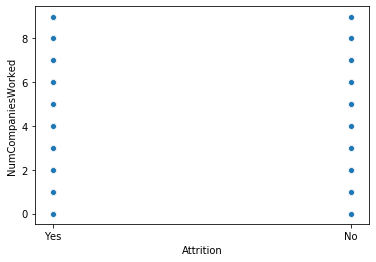

In [40]:
sns.scatterplot(x="Attrition", y="NumCompaniesWorked", data=df)

Based on NumCompaniesWorked, whether or not an employee is attrited is uniformly distributed

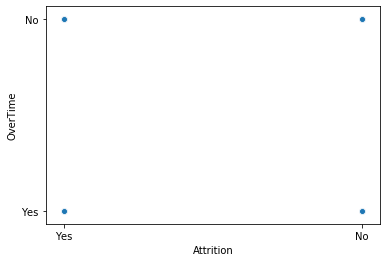

In [41]:
sns.scatterplot(x="Attrition", y="OverTime", data=df)

Based on OverTime, whether or not an employee is attrited is uniformly distributed for if he works overtime or not

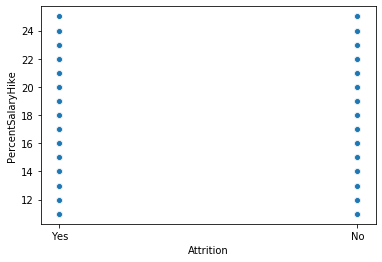

In [42]:
sns.scatterplot(x="Attrition", y="PercentSalaryHike", data=df)

Based on PercentSalaryHike, whether or not an employee is attrited is uniformly distributed

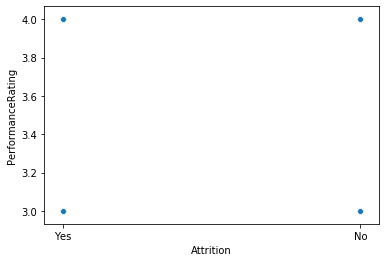

In [43]:
sns.scatterplot(x="Attrition", y="PerformanceRating", data=df)

Based on PerformanceRatinf, whether or not an employee is attrited is uniformly distributed

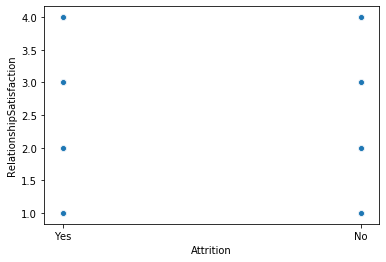

In [44]:
sns.scatterplot(x="Attrition", y="RelationshipSatisfaction", data=df)

Based on Marital RelationshipStatus, whether or not an employee is attrited is uniformly distributed

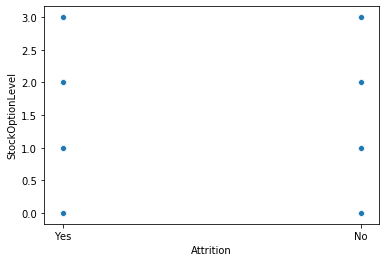

In [45]:
sns.scatterplot(x="Attrition", y="StockOptionLevel", data=df)

Based on StockoptionLevel, whether or not an employee is attrited is uniformly distributed

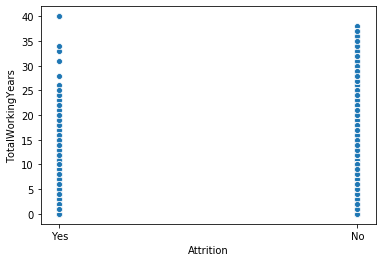

In [46]:
sns.scatterplot(x="Attrition", y="TotalWorkingYears", data=df)

Based on Total WorkingYears, whether or not an employee is attrited is almost uniformly distributed till 26 but after that attrition is not continuous which indicates that after working for 26-28 years some employees choose to retire or switch roles

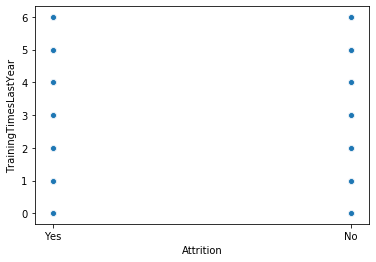

In [47]:
sns.scatterplot(x="Attrition", y="TrainingTimesLastYear", data=df)

Based on TrainingTimesLastYear, whether or not an employee is attrited is uniformly distributed

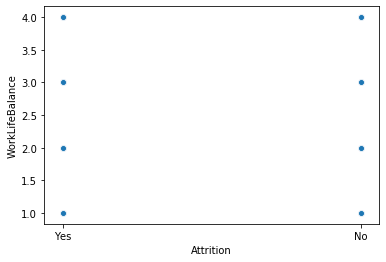

In [48]:
sns.scatterplot(x="Attrition", y="WorkLifeBalance", data=df)

Based on WorkLifeBalance, whether or not an employee is attrited is uniformly distributed

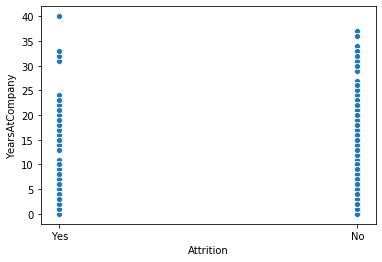

In [49]:
sns.scatterplot(x="Attrition", y="YearsAtCompany", data=df)

Based on YearsAtCompany, whether or not an employee is attrited is some what uniformly distributed but it is not continuous fro attrition which suggest that some employees may look for a change after working for 24-25 years in a company

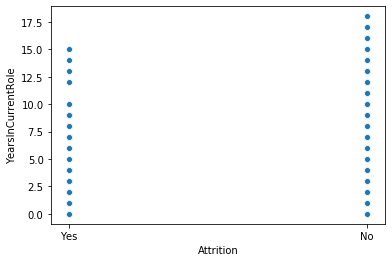

In [50]:
sns.scatterplot(x="Attrition", y="YearsInCurrentRole", data=df)

Based on YearsInCurrentRole, whether or not an employee is attrited is uniformly distributed

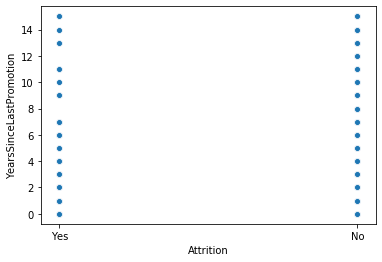

In [51]:
sns.scatterplot(x="Attrition", y="YearsSinceLastPromotion", data=df)

Based on YearsSinceLastPromotion, whether or not an employee is attrited is uniformly distributed

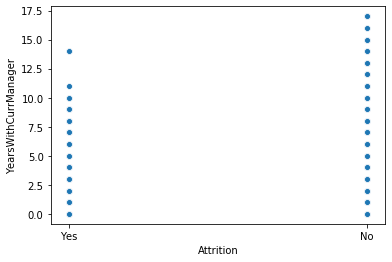

In [52]:
sns.scatterplot(x="Attrition", y="YearsWithCurrManager", data=df)

Based on YearWithCurrManager, whether or not an employee is attrited is uniformly distributed till 11 and they are less likely for attrition

DistPlot

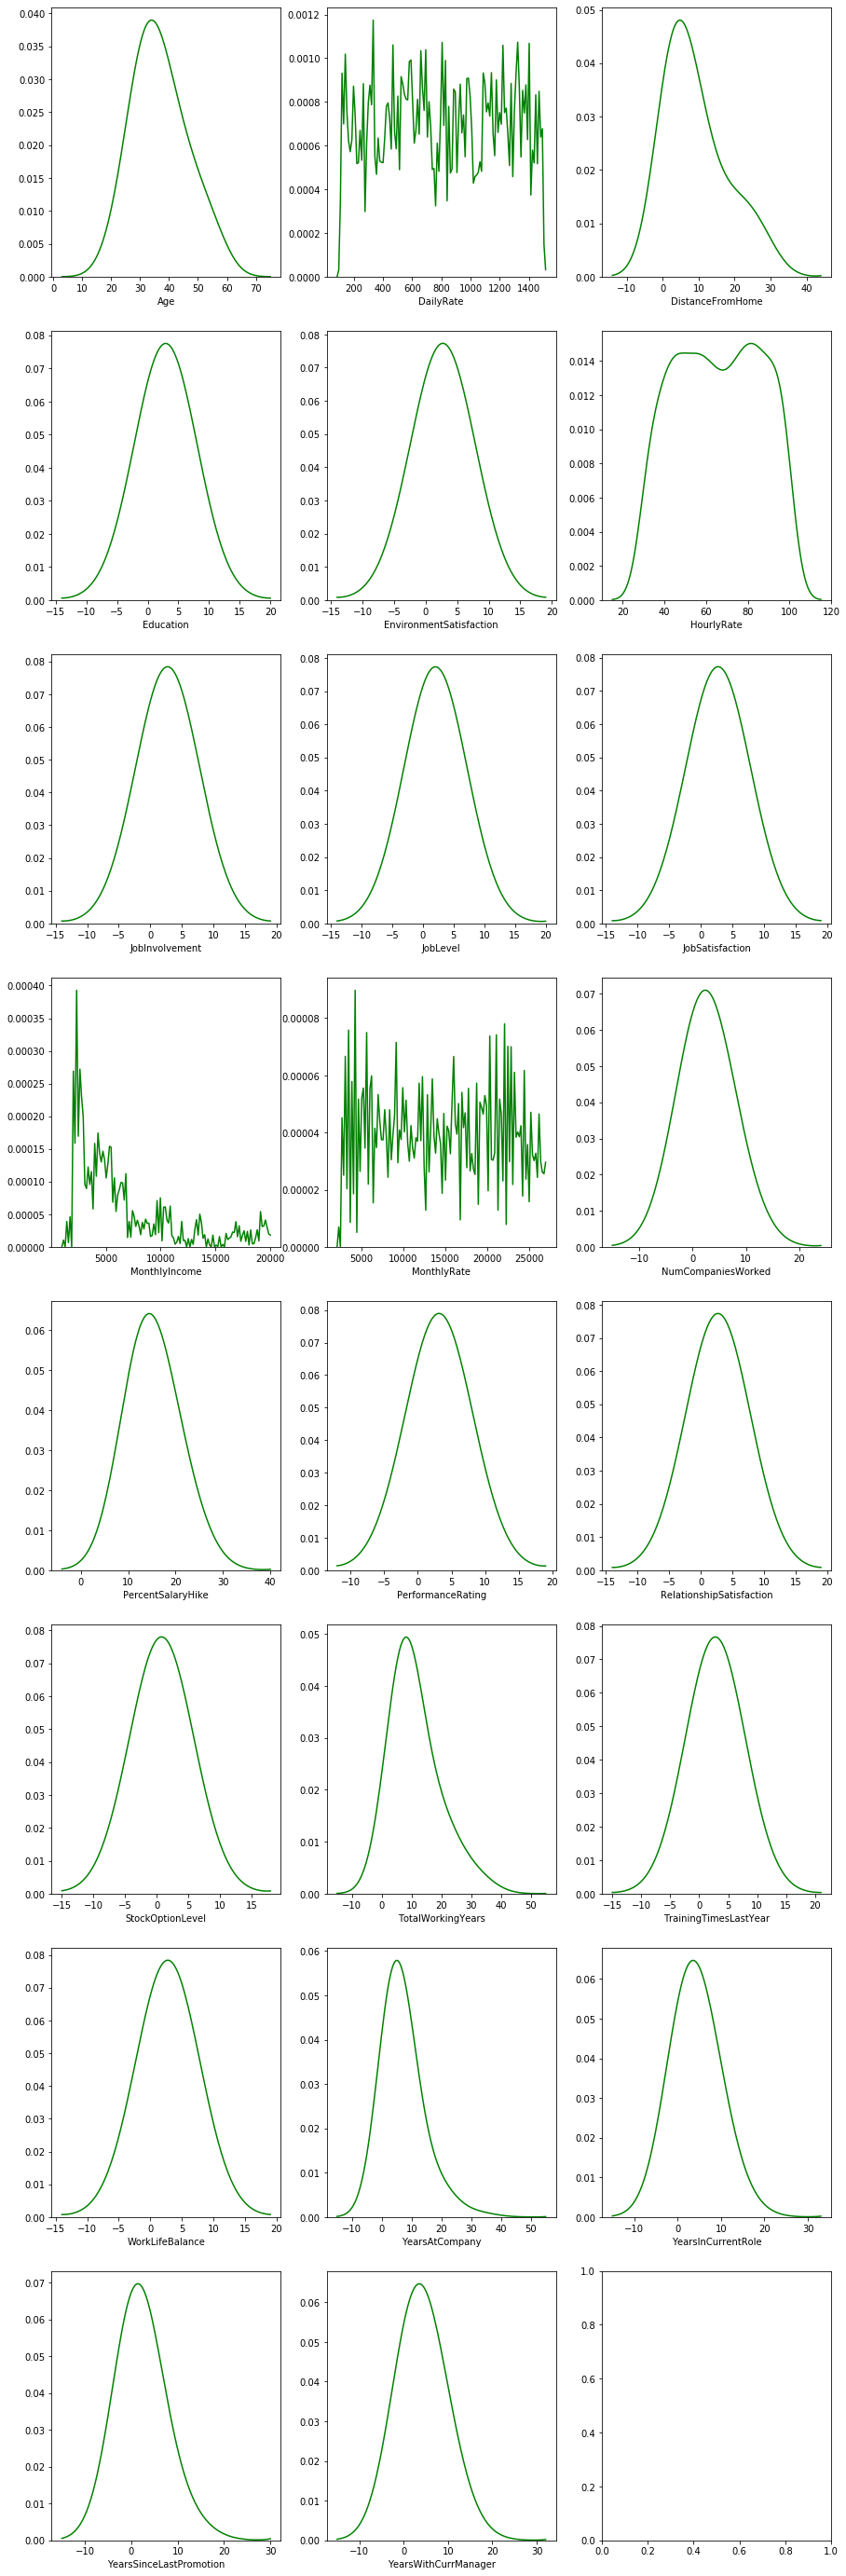

In [53]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[int_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={'bw':5})
    index += 1
plt.show()

from the above graphs we can observe that skewness is present, mostly right skewness.
    Skewness is present inDistance from home column,Monthly income,Years at company

Another thing that we can observe is that four of our columns are not normally distributed:
    1)The daily rate column is not normalised
    2)The monthlyincome column is not normalised
    3)The monthly Rate column is not normalised

The other columns are normalise which we can say by their bell shape

Boxplot

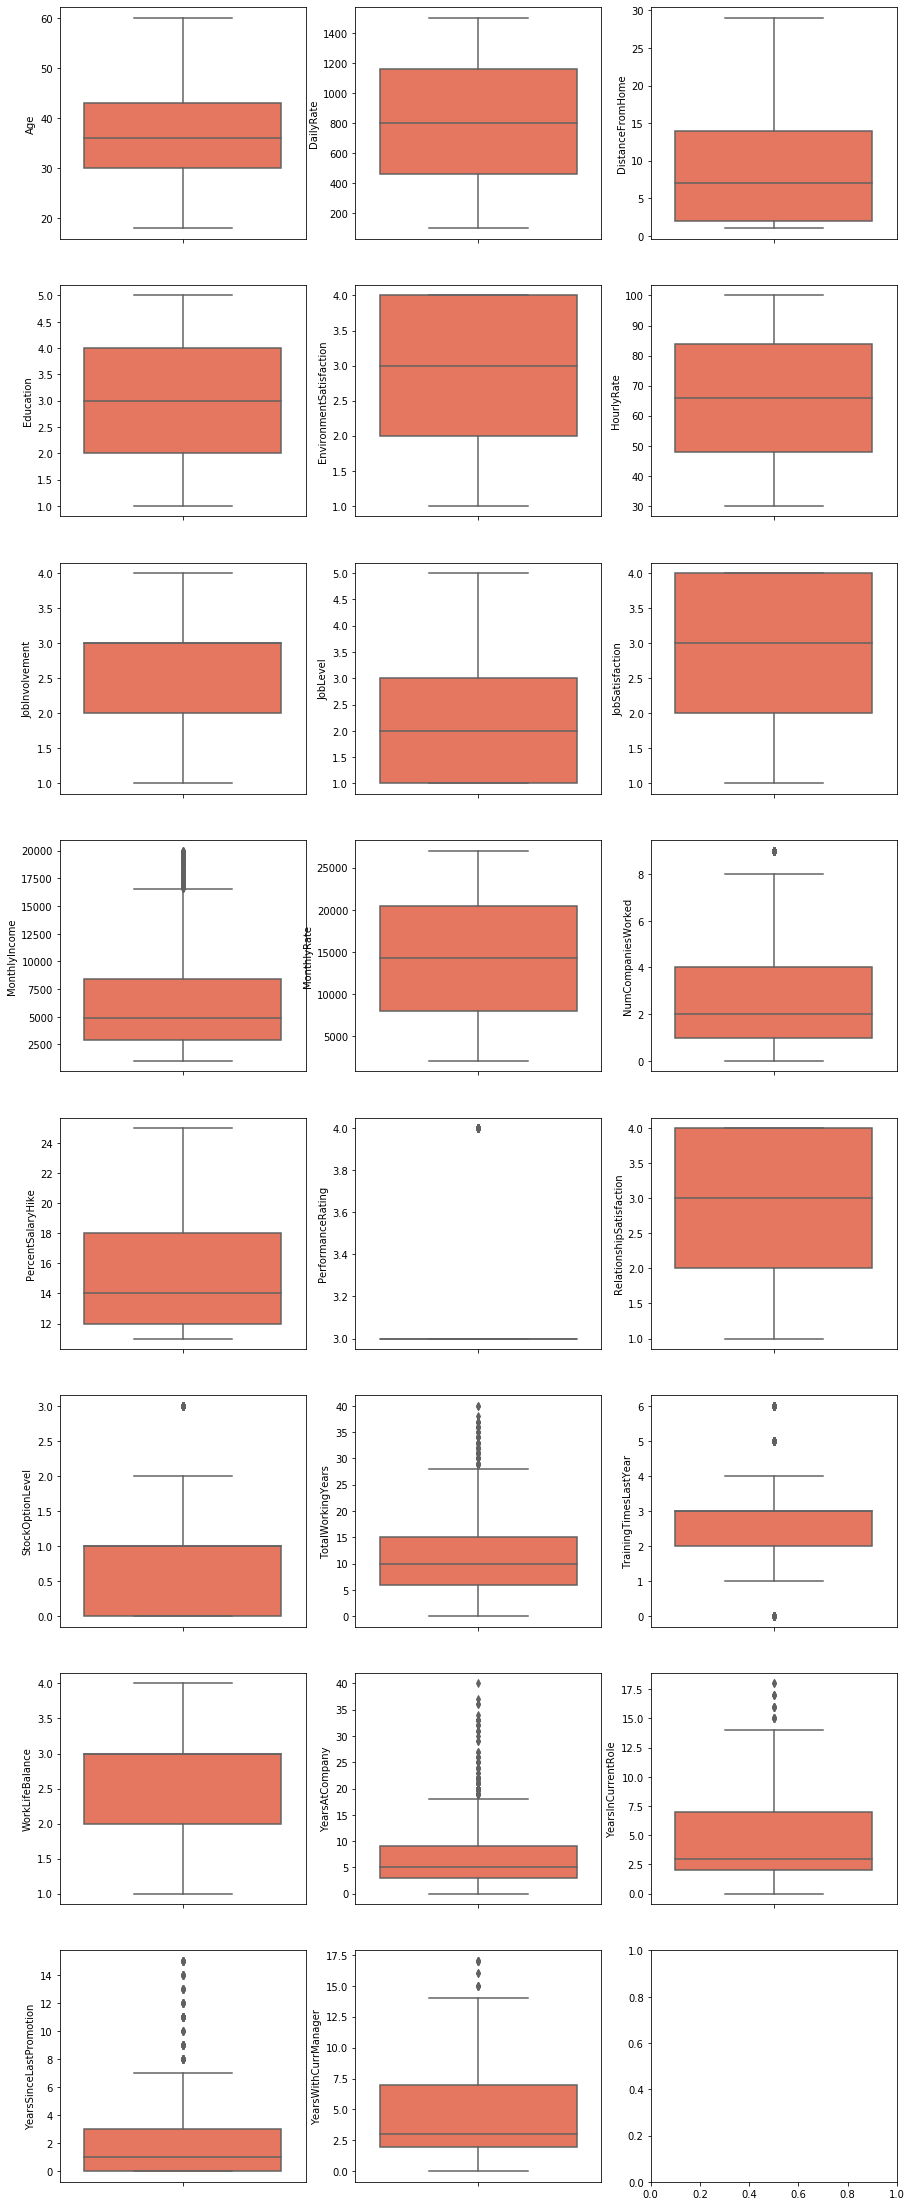

In [54]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,40))
index = 0
ax = ax.flatten()
for col, value in df[int_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Reds")
    index += 1
plt.show()


we can see the prescense of outliers in the following columns:
   
   1)Monthly income has continuous outliers
   
   2)Num companies has an outliers
   
   3)Performance rating has an outlier
   
   4)stockoption level has an outlier
   
   5)total working yars has continuous outliers 
   
   6)TrainingTimesLastYear has few ouliers present
   
   7)Years atCompany has a lot of continuous outliers
   
   8)YearInCurrentRole has a few outliers
   
   9)YearsSinceLastPromotion has quite a few ouliers
   
   10)Years With currentManager has few outliers
    
we will ue the zscore method later on to take care of these outliers

PairPlot

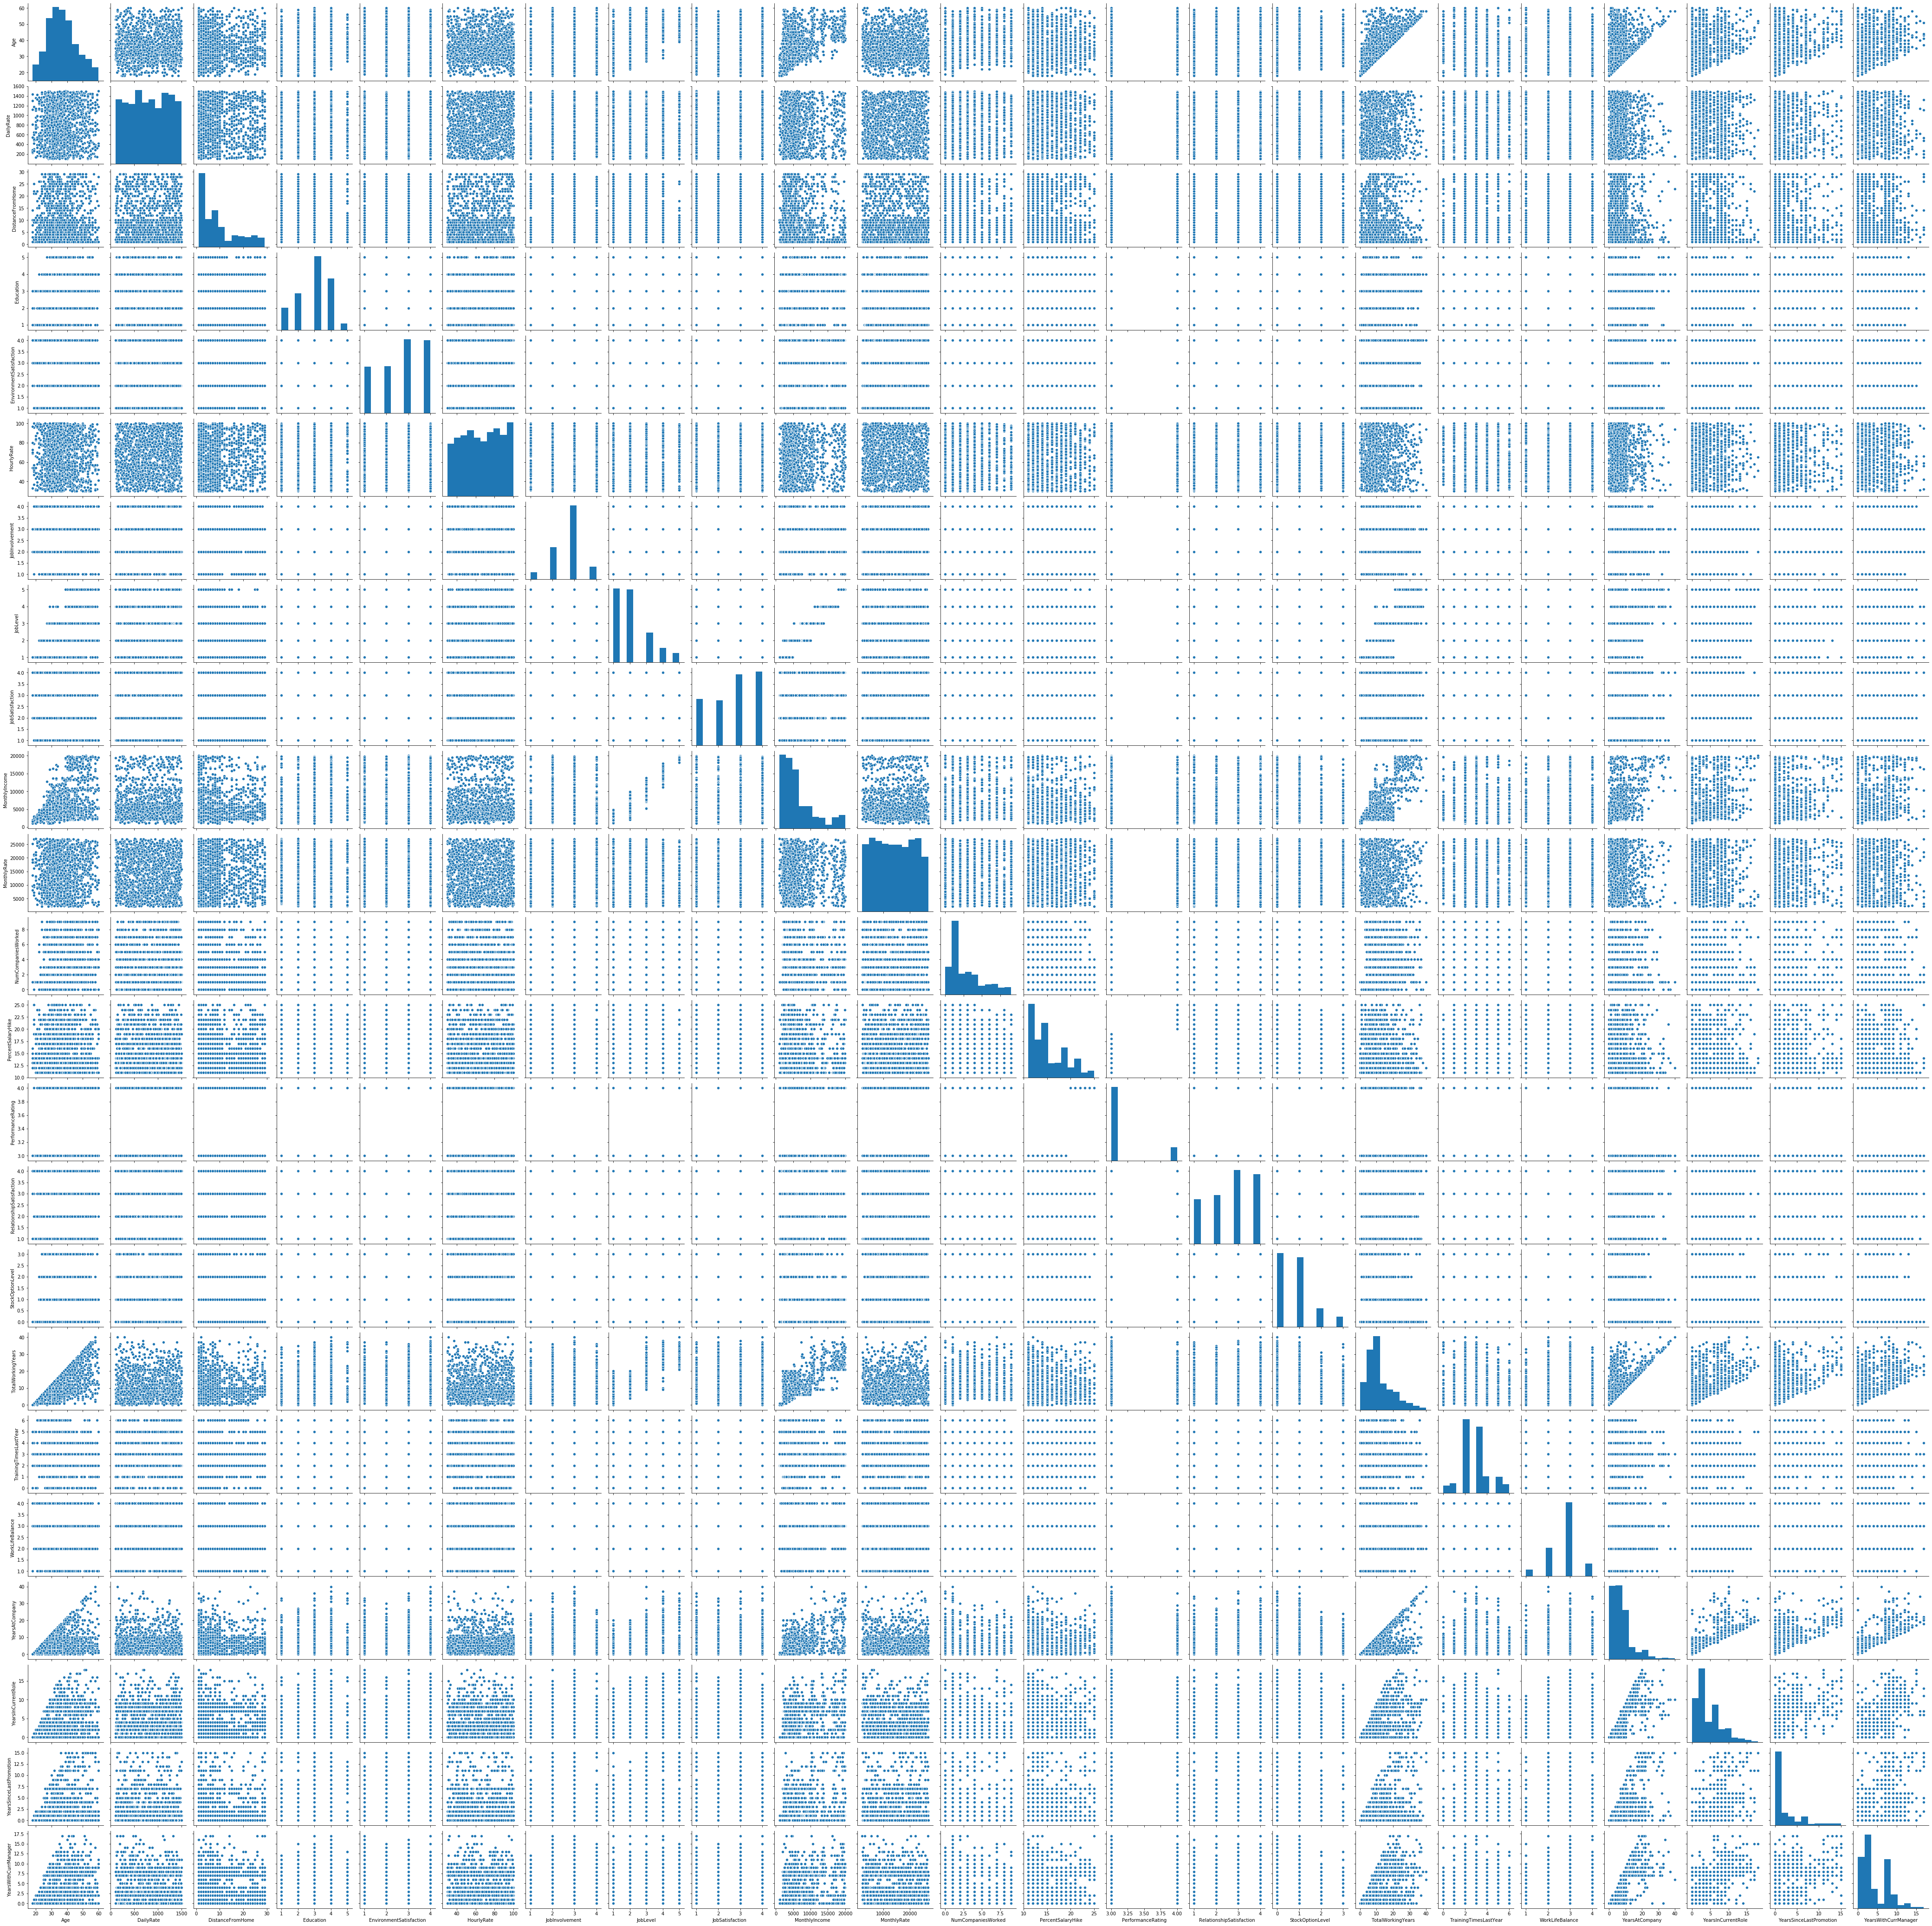

In [55]:
sns.pairplot(df)

# Encoding Of Data Frame

Let us use Label encoding to convert our target to int values, that is, 0's and 1's

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

we have succesfully converted our target column into binary values, 0's and 1's

Now let us covert our categorical independent variables datatype to int using ordinal encoder

In [57]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1             2.0       1102         2.0                 1   
1      49          0             1.0        279         1.0                 8   
2      37          1             2.0       1373         1.0                 2   
3      33          0             1.0       1392         1.0                 3   
4      27          0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0             1.0        884         1.0                23   
1466   39          0             2.0        613         1.0                 6   
1467   27          0             2.0        155         1.0                 4   
1468   49          0             1.0       1023         2.0                 2   
1469   34          0             2.0        628         1.0                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2             1.0                        2     0.0  ...   
1             1             1.0                        3     1.0  ...   
2             2             4.0                        4     1.0  ...   
3             4             1.0                        4     0.0  ...   
4             1             3.0                        1     1.0  ...   
...         ...             ...                      ...     ...  ...   
1465          2             3.0                        3     1.0  ...   
1466          1             3.0                        4     1.0  ...   
1467          3             1.0                        2     1.0  ...   
1468          3             3.0                        4     1.0  ...   
1469          3             3.0                        2     1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [58]:
df.dtypes

Age                           int64
Attrition                     int32
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

Now we can proceed further

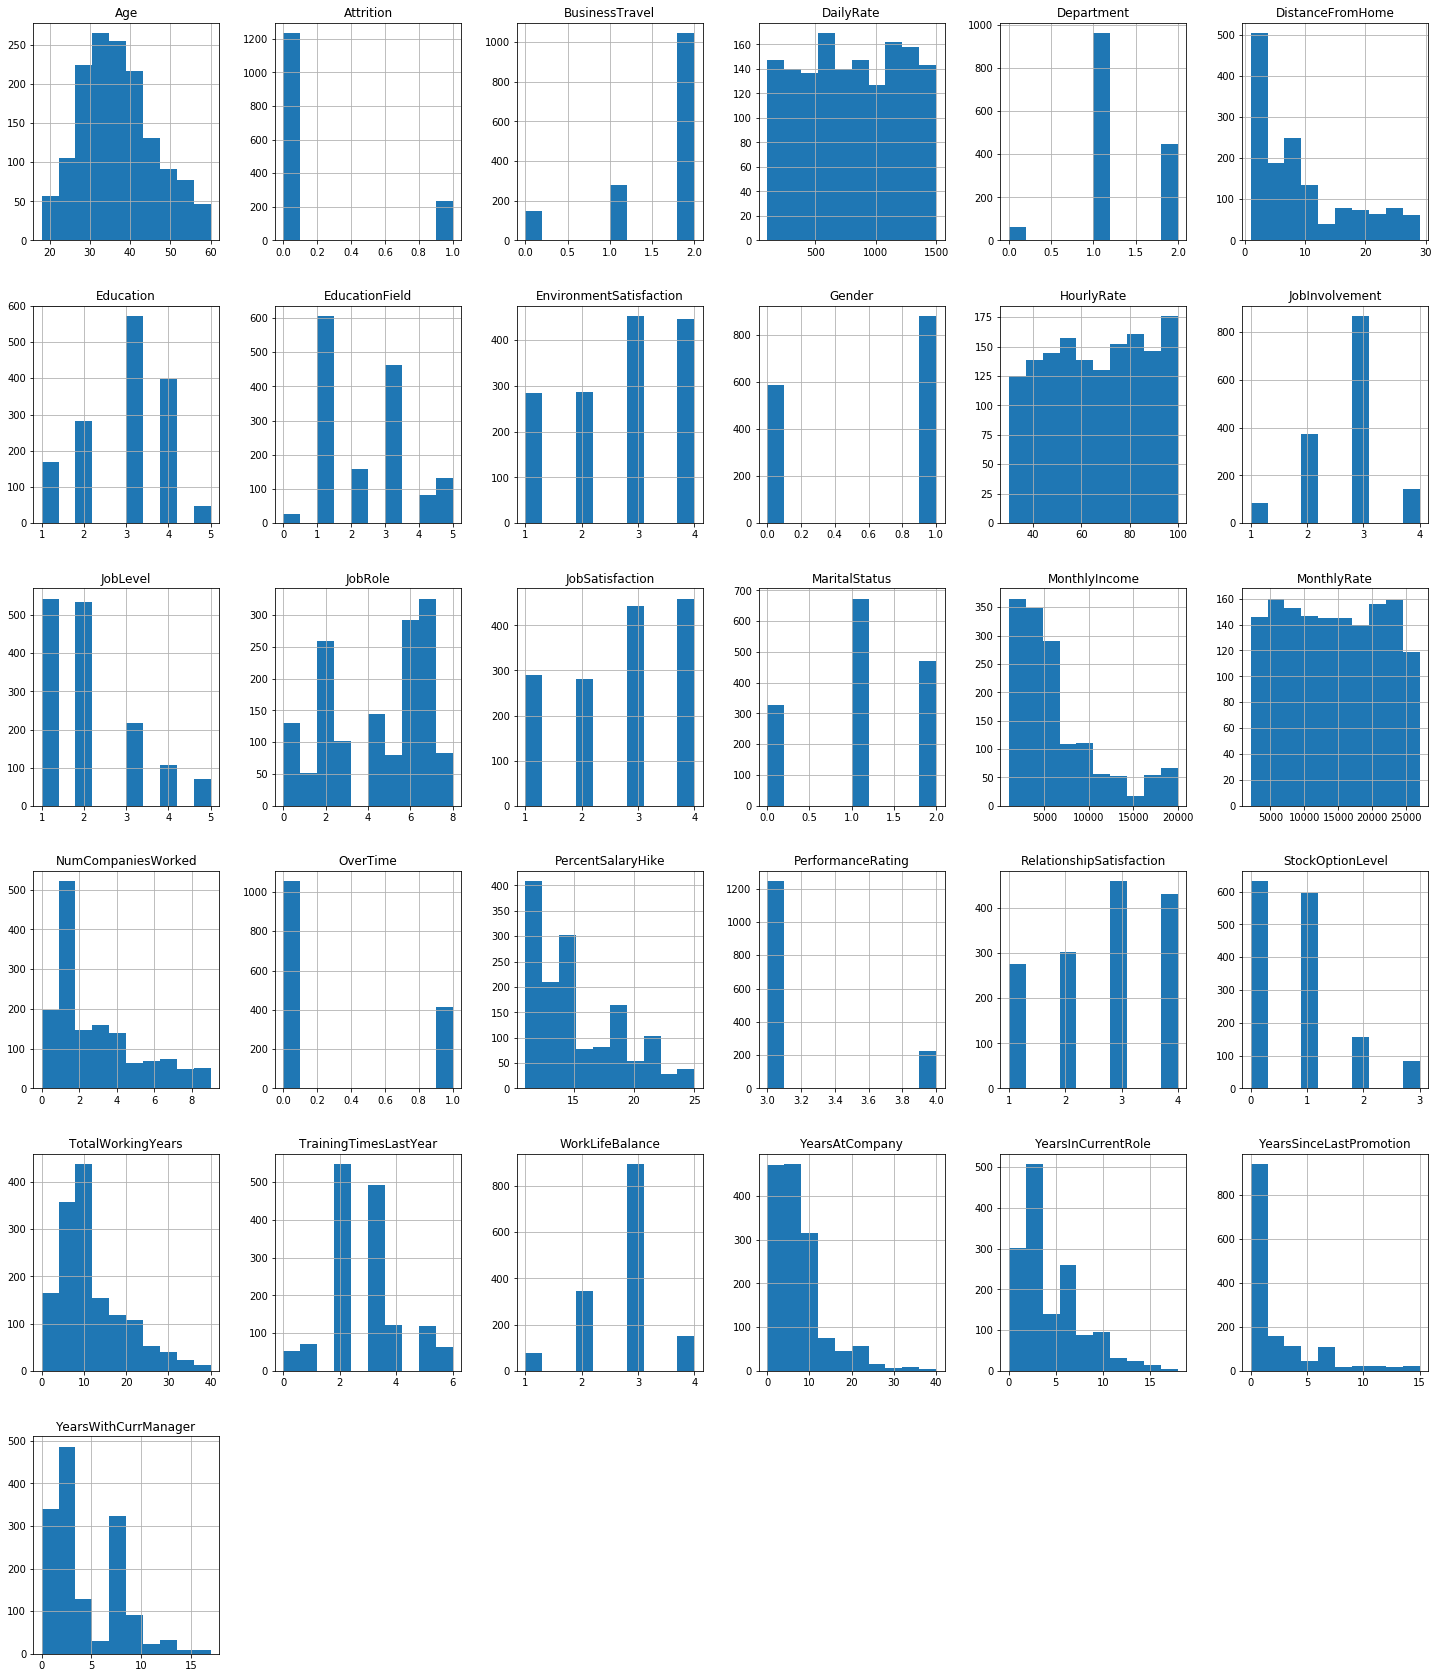

In [59]:
df.hist(figsize=(25,30))
plt.show()

we have plotted a histogram for our data frame after encoding

# Correlation With Target Columns

In [60]:
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

Now let us plot a heat map to understand the correlation better

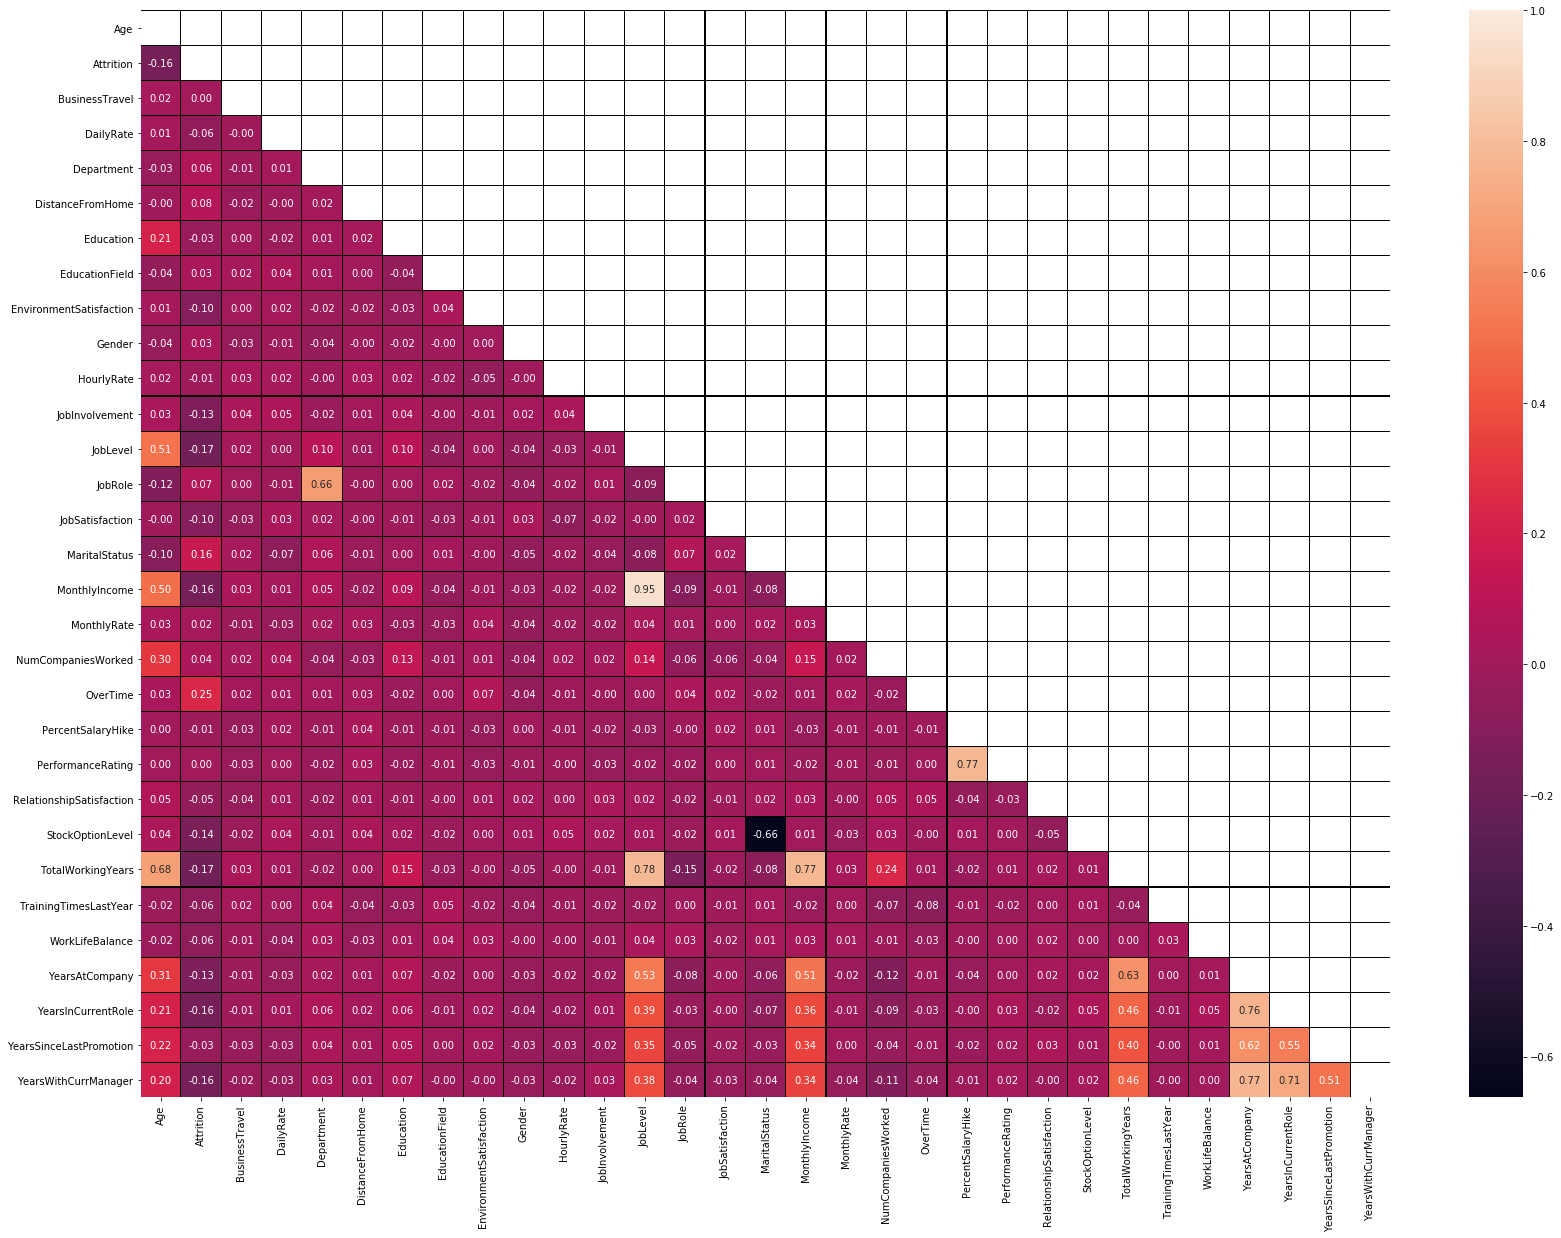

In [61]:
plt.figure(figsize=(28,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.2f',mask=np.triu(df.corr()))

It is easier for us to indentify the correlation between variables with the help of a heat map. A zero correlation indicates there is no relationship between variables. 
Our target column 'attrition' has both negative and positive correlation with our independent varaibles.If we assume the multicollinearity coefficient as r in the range +1,-1 then a value of 1 is said to be perfectly multicollinear.
i do not see any high correlation value

attrition is positively correlated with Overtime with a correlation values of 0.25 and negatively correlated with Total Working hours and JobLevel with a value of -0.17.

Since we do not have any high correlation values in the range 'r', there is no problem of multicollinearity

# Bar Plot for all the columns with the Target 'Attrition'

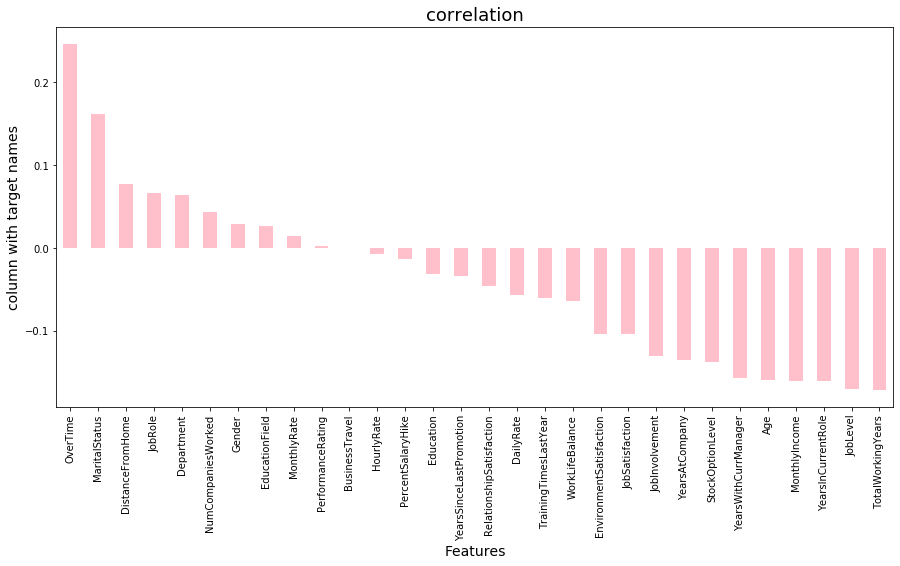

In [62]:
plt.figure(figsize=(15,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='pink')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

from the above plot we can easily identify the columns that are positivey correlated with the target(OverTime,MaritalStatus,DistanceFromHome,JobRole,
Department,NumCompaniesWorked,Gender,EducationalField,MonthlyRating,PerformanceRating) and all the other columns are negatively correlated with the target 

# Removing Ouliers

using z score to remove outliers

In [63]:
df.shape

(1470, 31)

applying zscore to remove ouliers

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

Setting the value of threshold as 3

In [65]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1             2.0       1102         2.0                 1   
1      49          0             1.0        279         1.0                 8   
2      37          1             2.0       1373         1.0                 2   
3      33          0             1.0       1392         1.0                 3   
4      27          0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0             1.0        884         1.0                23   
1466   39          0             2.0        613         1.0                 6   
1467   27          0             2.0        155         1.0                 4   
1468   49          0             1.0       1023         2.0                 2   
1469   34          0             2.0        628         1.0                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2             1.0                        2     0.0  ...   
1             1             1.0                        3     1.0  ...   
2             2             4.0                        4     1.0  ...   
3             4             1.0                        4     0.0  ...   
4             1             3.0                        1     1.0  ...   
...         ...             ...                      ...     ...  ...   
1465          2             3.0                        3     1.0  ...   
1466          1             3.0                        4     1.0  ...   
1467          3             1.0                        2     1.0  ...   
1468          3             3.0                        4     1.0  ...   
1469          3             3.0                        2     1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

Let us calculate the percentage loss of data in removing the outliers

In [66]:
Data_loss=((1470-1387)/1470)*100
print(Data_loss,'%')

5.646258503401361 %


The percentage data loss is not much therefore we can proceed ahead with our new dataframe

# Handling skewness using Log transfrom 
as it will give us better results

In [67]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

i observe that most of our columns are not in the range of (-0.5,0.5)

In [68]:
for col in int_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

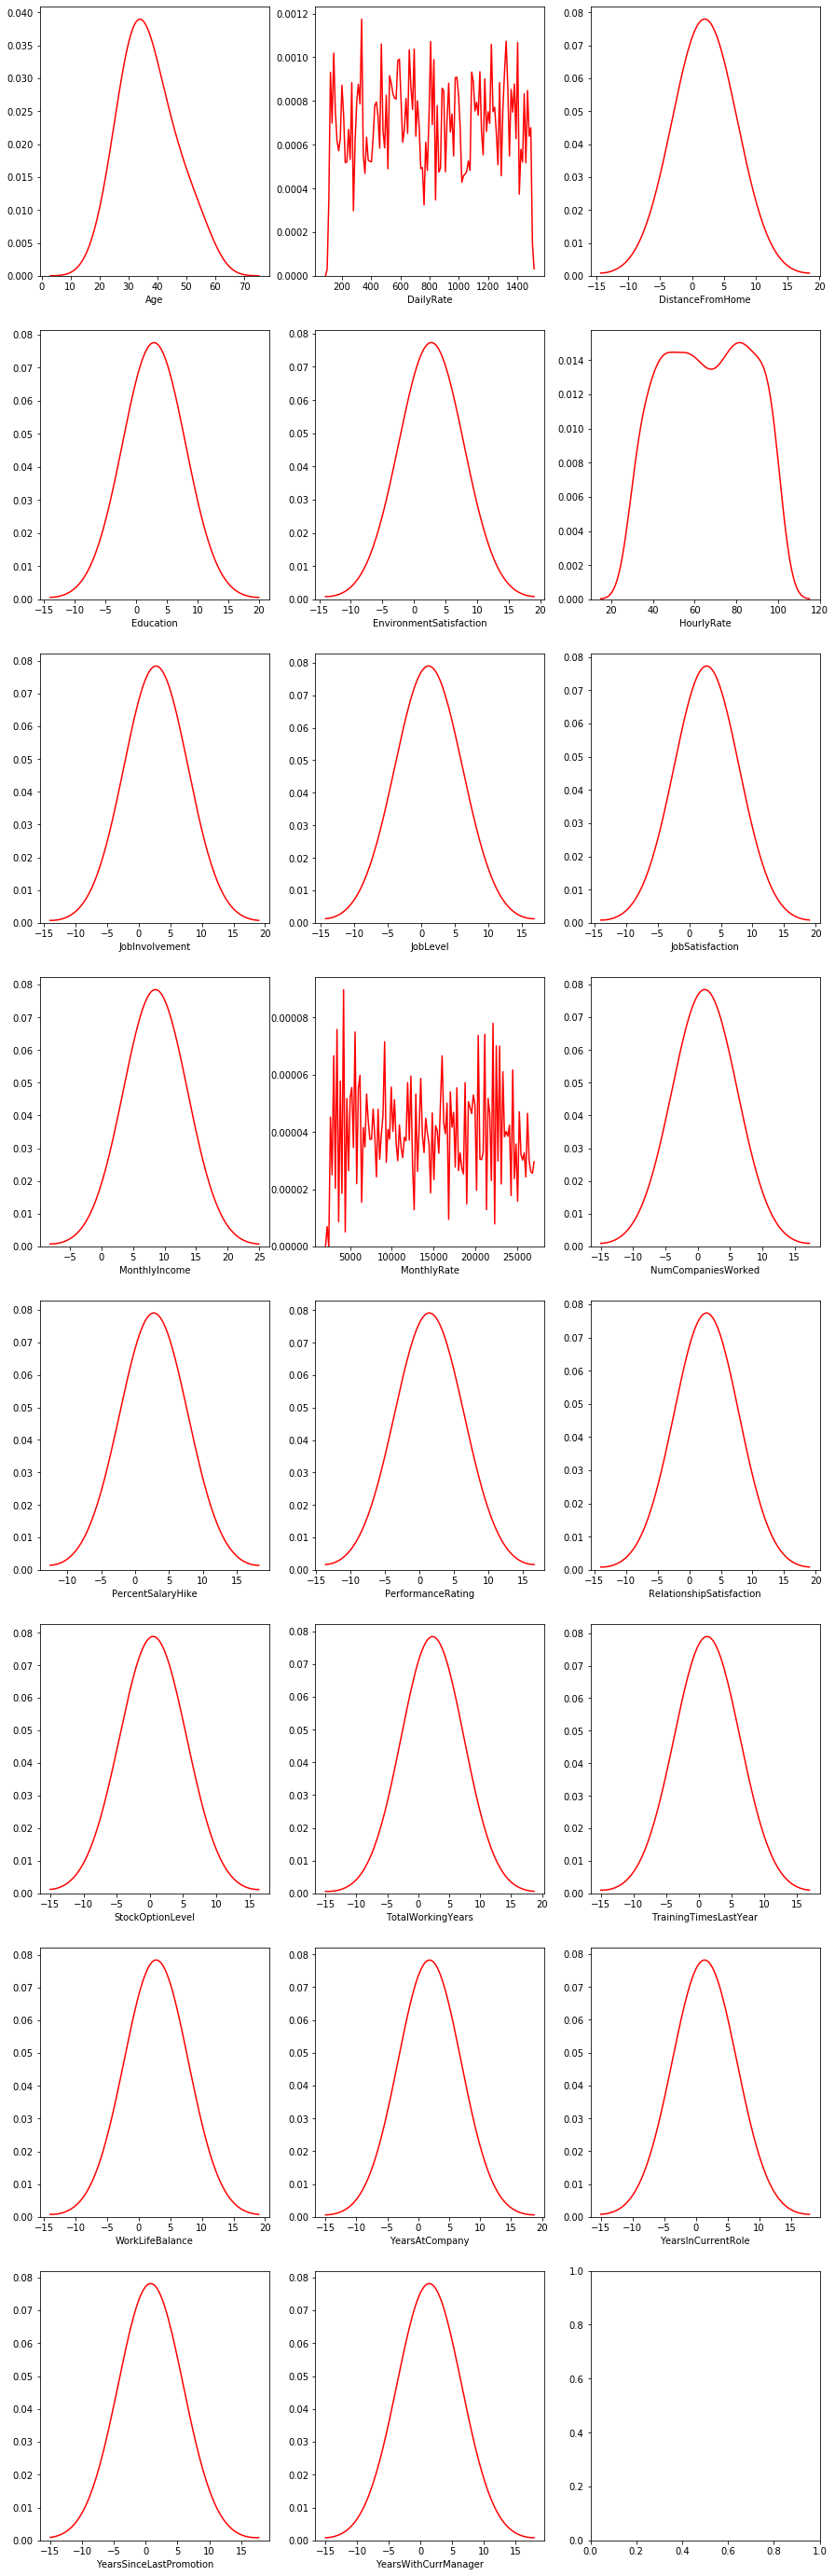

In [69]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[int_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"bw": 5})
    index += 1
plt.show()

we have been able to remove skewness upto some content from our integer columns

# Separating the columns into 'features' and 'targets' as 'x' and 'y'

In [70]:
x=df_new_z.drop('Attrition',axis=1)
y=df_new_z['Attrition']
print(x.shape)
print(y.shape)

(1387, 30)
(1387,)


# Taking Care of Class Imbalance using SMOTE

In [71]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

we observe that attrition data is not balance, therefore we need to balance it using SMOTE

In [72]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [73]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

we have successfully managed to balance the data

# Feature Scaling

to be on the safer side we will scale our data and standardize it.

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.72158458,  0.67462661,  0.86383963, ...,  0.27174611,
        -0.67541358,  0.61151746],
       [ 1.63919055, -0.99426364, -1.30623143, ...,  1.26968055,
        -0.24813747,  1.26948468],
       [ 0.26278159,  0.67462661,  1.57840738, ..., -1.05883315,
        -0.67541358, -1.03340058],
       ...,
       [-0.42542289, -0.7454963 , -0.63912575, ..., -0.39354352,
         1.46096699,  1.26948468],
       [-1.80183185,  0.67462661, -0.20142004, ..., -1.05883315,
        -0.67541358, -1.03340058],
       [ 0.72158458, -0.24911391, -1.16120846, ..., -0.72618833,
        -0.67541358, -0.04644976]])

# Power Transform

using power transfrom to covert our data into a gaussian distribution for better accuracy. We will be using yeo-johnson method as box cox is used for positive values

In [75]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.79382908,  0.782146  ,  0.87038804, ...,  0.56898281,
        -0.95649991,  0.84317201],
       [ 1.50468335, -1.319613  , -1.32885959, ...,  1.26467336,
         0.19252705,  1.26127733],
       [ 0.38659818,  0.782146  ,  1.5419954 , ..., -1.34803247,
        -0.95649991, -1.28682166],
       ...,
       [-0.33803777, -1.20923939, -0.62448887, ..., -0.20098768,
         1.53133051,  1.26127733],
       [-2.18112423,  0.782146  , -0.17418336, ..., -1.34803247,
        -0.95649991, -1.28682166],
       [ 0.79382908, -0.88385036, -1.17416775, ..., -0.72858428,
        -0.95649991,  0.24861486]])

# Since the target has binary values we will be using classification algorithms

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Finding the best Random State

In [77]:
maxAccu=0
maxRS=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 88.62745098039215 at Random State 53


# Logistic Lregression

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=31)

lr=LogisticRegression()
#training the model
lr.fit(x_train,y_train)
    
#Predicting y_test
pred=lr.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(lr,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  87.97385620915033

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       384
           1       0.89      0.87      0.88       381

    accuracy                           0.88       765
   macro avg       0.88      0.88      0.88       765
weighted avg       0.88      0.88      0.88       765

Cross Validation Score: 85.41027407462576

Accuracy Score - Cross Validation Score is 2.563582134524566


# SVC(Support Vector Classifier)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=31)

svc=SVC()
#training the model
svc.fit(x_train,y_train)
    
#Predicting y_test
pred=svc.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(svc,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  92.15686274509804

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       384
           1       0.94      0.90      0.92       381

    accuracy                           0.92       765
   macro avg       0.92      0.92      0.92       765
weighted avg       0.92      0.92      0.92       765

Cross Validation Score: 90.20630073732032

Accuracy Score - Cross Validation Score is 1.9505620077777195


# Random Forest Classifier

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=31)

rf=RandomForestClassifier()
#training the model
rf.fit(x_train,y_train)
    
#Predicting y_test
pred=rf.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(rf,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  93.4640522875817

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       384
           1       0.96      0.90      0.93       381

    accuracy                           0.93       765
   macro avg       0.94      0.93      0.93       765
weighted avg       0.94      0.93      0.93       765

Cross Validation Score: 92.40997616742386

Accuracy Score - Cross Validation Score is 1.0540761201578306


# Decision Tree Classifier

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=31)

dt=DecisionTreeClassifier()
#training the model
dt.fit(x_train,y_train)
    
#Predicting y_test
pred=dt.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(dt,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  83.92156862745098

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       384
           1       0.82      0.87      0.84       381

    accuracy                           0.84       765
   macro avg       0.84      0.84      0.84       765
weighted avg       0.84      0.84      0.84       765

Cross Validation Score: 84.46348774856632

Accuracy Score - Cross Validation Score is -0.5419191211153418


# KNeighborsClassifier

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=31)

kn=KNeighborsClassifier()
#training the model
kn.fit(x_train,y_train)
    
#Predicting y_test
pred=kn.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(kn,x,y,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  84.18300653594771

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.70      0.82       384
           1       0.76      0.99      0.86       381

    accuracy                           0.84       765
   macro avg       0.87      0.84      0.84       765
weighted avg       0.87      0.84      0.84       765

Cross Validation Score: 85.18991584121547

Accuracy Score - Cross Validation Score is -1.0069093052677545


After running all the above models i will choose RandomForestClassifier  as my best model since it has the least value of the difference between Accuracy score and cross validation score.

# Hyperparameter Tuning on RandomForestClassifier

The parameter have been taken after referring from the sklearn webpage

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [85]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [86]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [87]:
grid_search.best_score_

0.9174725983236622

In [98]:
Final_Model = RandomForestClassifier(bootstrap=True,max_features=2, max_depth=80, min_samples_leaf=4, 
                                     min_samples_split=8,n_estimators=1000)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
hcvs=cross_val_score(rf,x,y,cv=5)
print('Cross Validation score of Random Forest model : ',hcvs.mean())

Accuracy score for the Best Model is: 93.33333333333333
Cross Validation score of Random Forest model :  0.923666865271468


We can observe that our accuracy has decreased slightly after tunning and we have maxed out the perfomance of our model.
A small decrease in our model after tuning is an indication that we have reached diminishing return for hyperparameter tuning.

# AOC ROC Curve

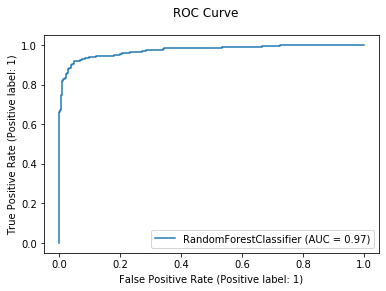

In [89]:
from sklearn import metrics
curve = metrics.plot_roc_curve(Final_Model, x_test, y_test)
curve.figure_.suptitle("ROC Curve")
plt.show()

# The Auc of my final model,RandomForestClassifier, is 97%

# Confusion Matrix

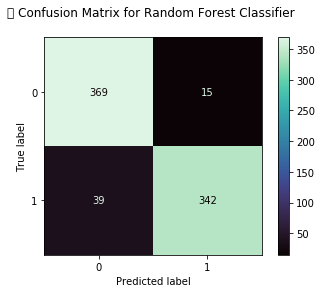

In [90]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Random Forest Classifier \n')
plt.show()

From the confusion matrix we can see that our TP=373,FP=11,FP=41,TN=340

that means that are 373 postive values were correctly classified

340 negative values were correctly classified

11 postive values were incorrectly classified

41 negative values were incorrectly classifed

all in all i can conclude that our confusionmatrix shows us that our model is working pretty well 

# Model Saving

In [95]:
import pickle
filename='HR_Analytics_E2.pkl'
pickle.dump(RandomForestClassifier(),open(filename,'wb'))